In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import cv2
from keras import layers
from keras.layers import Input,Dense,Activation,ZeroPadding2D,BatchNormalization,Flatten,Conv2D
from keras.layers import AveragePooling2D,MaxPooling2D,Dropout,GlobalMaxPooling2D,GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.preprocessing import image
gen = image.ImageDataGenerator()

Using TensorFlow backend.


In [2]:
test_dataset = 'C:\\Users\\HP\\Desktop\\cnn\\sign detection\\sign-language-mnist\\sign_mnist_test.csv'
test = pd.read_csv(test_dataset)
#print(test.shape)
#test.head()
train_dataset = 'C:\\Users\\HP\\Desktop\\cnn\\sign detection\\sign-language-mnist\\sign_mnist_train.csv'
train = pd.read_csv(train_dataset)
#print(train.shape)

In [3]:
X_train = (train.iloc[:,1:].values).astype('float32')
Y_train = (train.iloc[:,0].values).astype('int32')
X_test = (test.iloc[:,1:].values).astype('float32')
Y_test = (test.iloc[:,0].values).astype('int32')

(7172, 1)


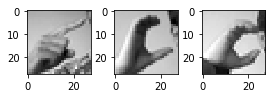

In [4]:
X_train = X_train.reshape(X_train.shape[0], 28, 28)
for i in range(1,4):
    plt.subplot(3,4,i+1)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
X_train = X_train/255
X_test = X_test/255
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)
Y_train = Y_train.reshape(Y_train.shape[0],1)
Y_test = Y_test.reshape(Y_test.shape[0],1)
print(Y_test.shape)


In [5]:
Y_train = to_categorical(Y_train)

In [6]:
def sign(input_shape):
    X_input = Input(input_shape)
    X = Conv2D(64,(3,3),strides = (1,1),name = 'convo2')(X_input)
    X = BatchNormalization(axis = 1,name = 'bn4')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2,2))(X)
    X = Conv2D(64,(3,3),strides = (1,1),name = 'convo3')(X)
    X = BatchNormalization(axis = 1,name = 'bn5')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2,2))(X)
    X = Conv2D(64,(3,3),strides = (1,1),name = 'convo4')(X)
    X = Activation('relu')(X)
    X = Flatten()(X)
    X = Dense(130, activation='relu')(X)
    X = Dropout(0.3)(X)
    X = Dense(25, activation='softmax')(X)
    model = Model(inputs = X_input, outputs = X, name='sign')
    return model

In [7]:
detect = sign(X_train.shape[1:])
detect.compile('adamax',loss = 'categorical_crossentropy',metrics = ["accuracy"])

In [8]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.30, random_state=100)
detect.fit(X_train,Y_train,validation_data = (X_val,Y_val),epochs = 10,batch_size = 150)

Train on 19218 samples, validate on 8237 samples
Epoch 1/10
19218/19218 [==============================] - 229s 12ms/step - loss: 2.1956 - acc: 0.3450 - val_loss: 1.4139 - val_acc: 0.8132
Epoch 2/10
19218/19218 [==============================] - 224s 12ms/step - loss: 0.5055 - acc: 0.8454 - val_loss: 0.2427 - val_acc: 0.9840
Epoch 3/10
19218/19218 [==============================] - 222s 12ms/step - loss: 0.1489 - acc: 0.9615 - val_loss: 0.0417 - val_acc: 0.9994
Epoch 4/10
19218/19218 [==============================] - 241s 13ms/step - loss: 0.0640 - acc: 0.9855 - val_loss: 0.0226 - val_acc: 0.9983
Epoch 5/10
19218/19218 [==============================] - 250s 13ms/step - loss: 0.0385 - acc: 0.9926 - val_loss: 0.0059 - val_acc: 1.0000
Epoch 6/10
19218/19218 [==============================] - 238s 12ms/step - loss: 0.0238 - acc: 0.9955 - val_loss: 0.0035 - val_acc: 0.9999
Epoch 7/10
19218/19218 [==============================] - 249s 13ms/step - loss: 0.0183 - acc: 0.9962 - val_loss: 0.0

In [9]:
detect.evaluate(X_train,Y_train,batch_size = 200,verbose = 1)

19218/19218 [==============================] - 98s 5ms/step


[0.0003451800702528586, 1.0]

In [10]:
X_test = (test.iloc[:,1:].values).astype('float32')
Y_test = (test.iloc[:,0].values).astype('int32')
X_test = X_test.reshape(X_test.shape[0],28,28,1)
Y_test = to_categorical(Y_test)
print(Y_test.shape)

(7172, 25)


In [11]:
pred = detect.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, pred.round())

0.884829894032348

In [13]:
detect.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
convo2 (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
bn4 (BatchNormalization)     (None, 26, 26, 64)        104       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
convo3 (Conv2D)              (None, 11, 11, 64)        36928     
_________________________________________________________________
bn5 (BatchNormalization)     (None, 11, 11, 64)        44        
__________